# Requirement
NOTE:
All data in this workbook is fictitious and has been generated for case study purposes only.



Overall objective: 
Business needs to understand most and least profitable customers (top X and bottom X ).

We want to see:
1. documentation of how you met the objective as this documentation would be used by a  squad to create a dashboard that refreshes daily.
2. wireframe of a dashboard/visualisation that the squad could prepare to provide the business with this information.

Any additional insights to share with the business would be valuable.

Timebox activity to not more than 48 hours.

Responses are acceptable in any shareable format.


# Overall objective: 
Business needs to understand most and least profitable customers (top X and bottom X ).

# Summary step to get top x and botom x profitable customer

##### Step 1: Merge Contract_profit with contract on contract ID to get account number
##### Step 2: Merge again with account to get customer id on account ID
##### Step 3: Merge with Customer data to get email and name
##### Step 4: Filter by relevant product
##### Step 5: Sort by Profit_after_discount to get top x and bottom x customer list

# Possible wireframe of a dashboard

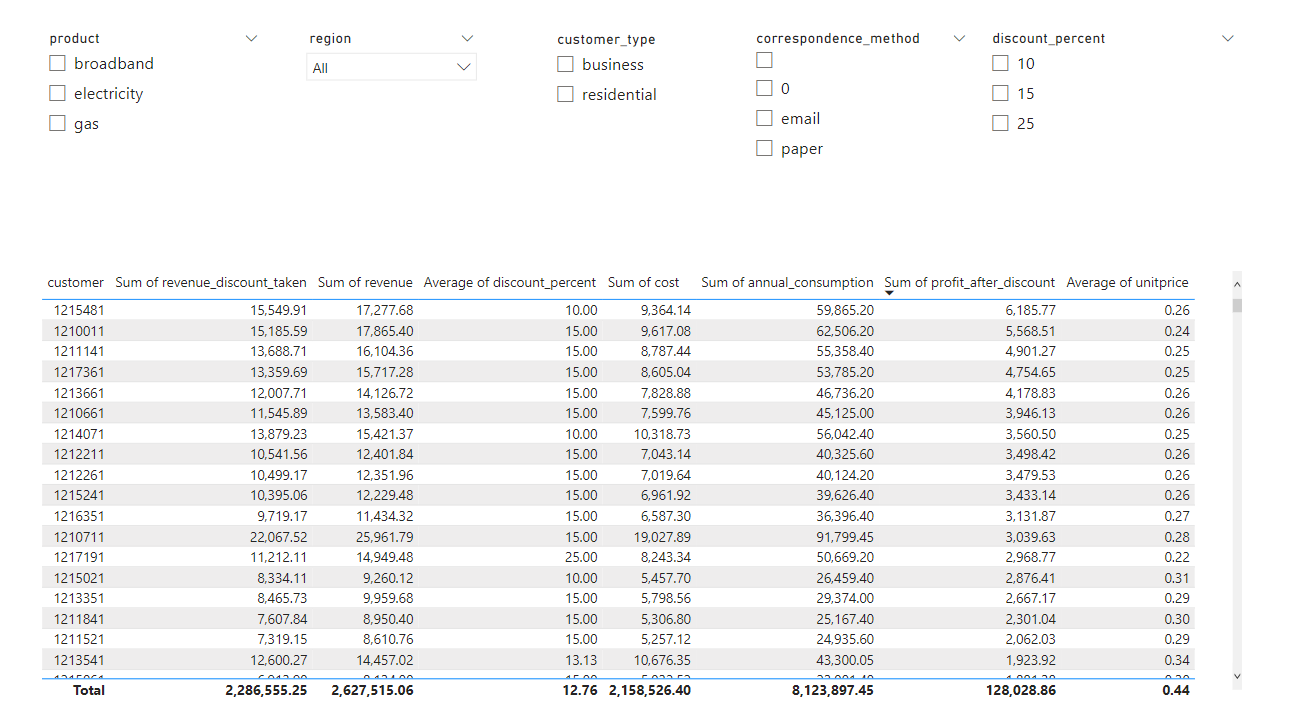

# Import required libraries

In [3]:
# Part 1
import pandas as pd
import numpy as np
# Part 2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Part 3
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Data loading

## Dimensional data

In [4]:
#read with pandas 
#Get all dimensions data

# Get customer data

data_customer=pd.read_excel('Downloads/Analyst case study.xlsx',sheet_name='customer')

# Get account data

data_acc=pd.read_excel('Downloads/Analyst case study.xlsx',sheet_name='account')

# Get contract data

data_contract=pd.read_excel('Downloads/Analyst case study.xlsx',sheet_name='contract')



## Quick look at account table to see if 1 customer can have multiple accounts

In [5]:
# get dimensions of our data
data_acc.shape

(971, 5)

In [6]:
# see number of unique value
data_acc.nunique()

account                  967
customer                 925
dual_energy                1
correspondence_method      3
customer_type              2
dtype: int64

##### this confirm 1 customer can have multiple accounts (925vs 967 acc)
There is 925 customers with a total 967 accoutns
There is 3 correspondences_method
There is 2 customer type


In [7]:
# see number of unique value
data_contract.nunique()

contract        967
account         963
move_in_date    557
product           3
region            9
dtype: int64

There are 3 products type

## Fact datatable

In [9]:
# Get profit data

data_profit=pd.read_excel('Downloads/Analyst case study.xlsx',sheet_name='contract_profit')


In [10]:
data_profit.head(5)

,contract,annual_consumption,revenue,cost,discount_percent,profit,revenue_discount_taken,profit_after_discount
0,1130,3901.65,1230.38,1063.99,10,166.39,1107.3420,43.3520
1,1029,436.05,596.00,617.65,10,-21.65,536.4000,-81.2500
2,1198,2780.65,765.06,863.90,10,-98.84,688.5540,-175.3460
3,1515,528.20,885.81,593.40,15,292.41,752.9385,159.5385
4,1801,13338.95,3398.65,2938.28,15,460.37,2888.8525,-49.4275


### Get unit price for further analysis 
Unit price= revenue_discount_taken/annual_consumption

In [47]:
data_profit['unitprice']=data_profit['revenue_discount_taken']/data_profit['annual_consumption']

In [48]:
data_profit.head(5)

,contract,annual_consumption,revenue,cost,discount_percent,profit,revenue_discount_taken,profit_after_discount,unitprice
0,1130,3901.65,1230.38,1063.99,10,166.39,1107.3420,43.3520,0.283814
1,1029,436.05,596.00,617.65,10,-21.65,536.4000,-81.2500,1.230134
2,1198,2780.65,765.06,863.90,10,-98.84,688.5540,-175.3460,0.247623
3,1515,528.20,885.81,593.40,15,292.41,752.9385,159.5385,1.425480
4,1801,13338.95,3398.65,2938.28,15,460.37,2888.8525,-49.4275,0.216573


In [50]:
data_profit.describe()

,contract,annual_consumption,revenue,cost,discount_percent,profit,revenue_discount_taken,profit_after_discount,unitprice
count,1000.000000,989.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000
mean,1499.467000,7696.952831,2458.997920,2052.810718,12.575000,406.187202,2143.923964,91.113245,0.451871
std,288.801183,9792.220859,2592.144028,2100.789870,3.457793,697.344741,2170.877857,348.686113,0.609151
min,1000.000000,100.700000,-10090.200000,300.370000,10.000000,-11769.310000,227.115000,-988.447500,0.088764
25%,1249.750000,3163.500000,1245.927500,1058.705000,10.000000,139.535000,1095.379125,-62.078875,0.257990
50%,1499.500000,4948.550000,1733.890000,1434.460000,10.000000,298.650000,1511.409250,63.716000,0.306779
75%,1749.250000,8642.150000,2764.932500,2219.240000,15.000000,516.655000,2423.800500,187.428250,0.381275
max,1999.000000,163762.900000,45952.460000,37565.110000,25.000000,8387.350000,39059.591000,3560.503000,8.545785


## data exloratory

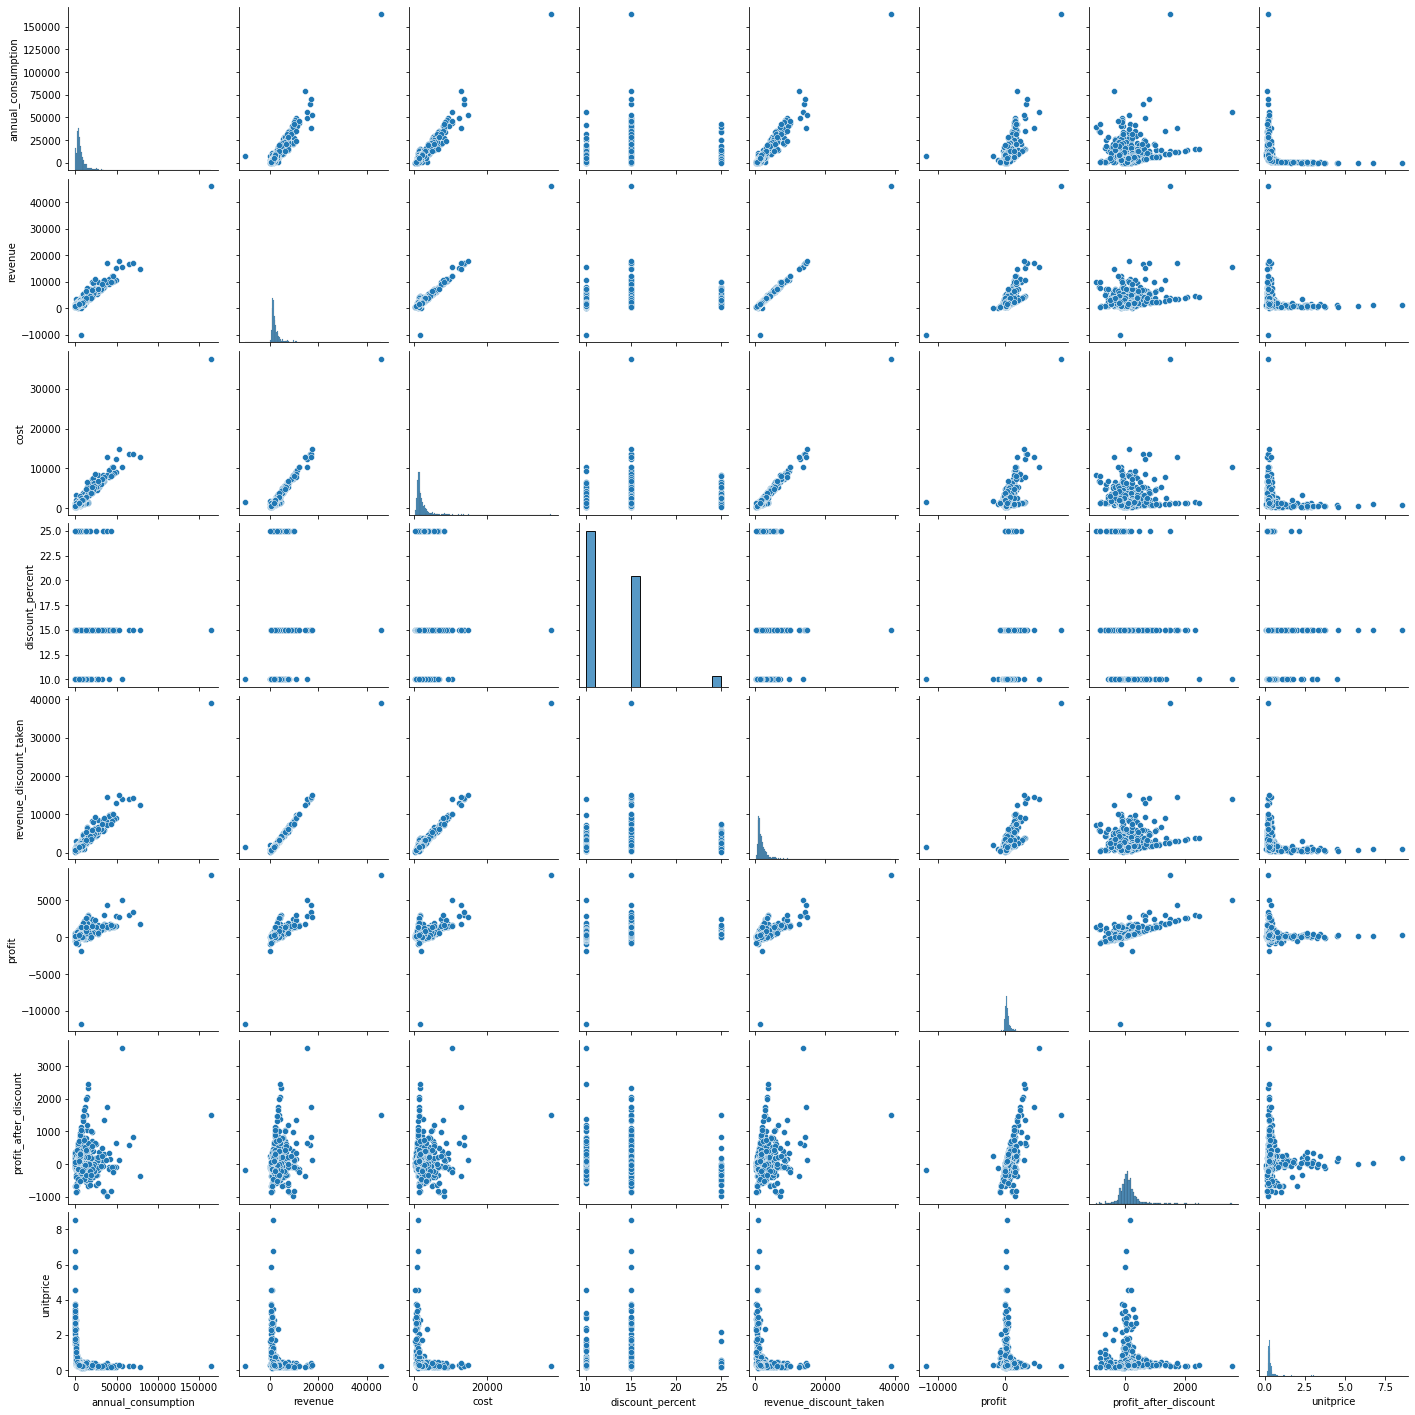

In [173]:
#Plot pairplot

sns.pairplot(data_profit[['annual_consumption','revenue','cost','discount_percent','revenue_discount_taken','profit','profit_after_discount','unitprice']])

## Check for null data

In [51]:
data_profit.isnull().sum()

contract                   0
annual_consumption        11
revenue                    0
cost                       0
discount_percent           0
profit                     0
revenue_discount_taken     0
profit_after_discount      0
unitprice                 11
dtype: int64

There are 11 entries that have a missing annual consumption but still have revenue and cost...

# Get datatable to sort out top/least profitable cutomer

#### We will join 'contact' column on Data_profit with 'contract' column on Data_acc then join with Data_acc to find out their customer ID first


In [52]:
# Merge with Data_contact to get account ID
df1=pd.merge(data_profit,data_contract, how='left', on=['contract','contract'])

In [59]:
# get only columns that we need
df2 = df1[['contract', 'annual_consumption','revenue','cost','discount_percent','profit','revenue_discount_taken','profit_after_discount','unitprice','account','product','region']]

In [60]:
#remove duplicated row created by merging
df2.drop_duplicates()

,contract,annual_consumption,revenue,cost,discount_percent,profit,revenue_discount_taken,profit_after_discount,unitprice,account,product,region
0,1130,3901.65,1230.38,1063.99,10,166.39,1107.3420,43.3520,0.283814,C2226,gas,auckland
1,1029,436.05,596.00,617.65,10,-21.65,536.4000,-81.2500,1.230134,C2099,electricity,christchurch
2,1198,2780.65,765.06,863.90,10,-98.84,688.5540,-175.3460,0.247623,C1388,gas,taupo
3,1515,528.20,885.81,593.40,15,292.41,752.9385,159.5385,1.425480,C2066,electricity,christchurch
4,1801,13338.95,3398.65,2938.28,15,460.37,2888.8525,-49.4275,0.216573,C1767,electricity,christchurch
...,...,...,...,...,...,...,...,...,...,...,...,...
1061,1176,3395.30,1221.21,1048.26,10,172.95,1099.0890,50.8290,0.323709,C1660,gas,wellington
1062,1552,5768.40,1997.91,1505.06,10,492.85,1798.1190,293.0590,0.311719,C1437,electricity,tauranga
1063,1400,7951.50,1981.86,1999.95,10,-18.09,1783.6740,-216.2760,0.224319,C1850,gas,queenstown
1064,1373,325.85,644.93,518.97,10,125.96,580.4370,61.4670,1.781301,C1285,electricity,christchurch


In [61]:
# Merge with Data_account to get Customer ID
df3=pd.merge(df2,data_acc, how='left', on=['account','account'])

In [63]:
# Arrange datatable and get columns we need to
df3=df3[['customer','account','contract','annual_consumption','revenue','cost','discount_percent','revenue_discount_taken','profit','profit_after_discount','unitprice','customer_type','product','region','correspondence_method']]

In [66]:
#remove duplicated row created by merging
df3.drop_duplicates()

,customer,account,contract,annual_consumption,revenue,cost,discount_percent,revenue_discount_taken,profit,profit_after_discount,unitprice,customer_type,product,region,correspondence_method
0,1218151,C2226,1130,3901.65,1230.38,1063.99,10,1107.3420,166.39,43.3520,0.283814,residential,gas,auckland,paper
1,1216231,C2099,1029,436.05,596.00,617.65,10,536.4000,-21.65,-81.2500,1.230134,business,electricity,christchurch,paper
2,1211011,C1388,1198,2780.65,765.06,863.90,10,688.5540,-98.84,-175.3460,0.247623,residential,gas,taupo,paper
3,1210521,C2066,1515,528.20,885.81,593.40,15,752.9385,292.41,159.5385,1.425480,business,electricity,christchurch,email
4,1214091,C1767,1801,13338.95,3398.65,2938.28,15,2888.8525,460.37,-49.4275,0.216573,business,electricity,christchurch,email
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1217481,C1660,1176,3395.30,1221.21,1048.26,10,1099.0890,172.95,50.8290,0.323709,residential,gas,wellington,email
1066,1211731,C1437,1552,5768.40,1997.91,1505.06,10,1798.1190,492.85,293.0590,0.311719,residential,electricity,tauranga,email
1067,1218331,C1850,1400,7951.50,1981.86,1999.95,10,1783.6740,-18.09,-216.2760,0.224319,residential,gas,queenstown,email
1068,1211751,C1285,1373,325.85,644.93,518.97,10,580.4370,125.96,61.4670,1.781301,business,electricity,christchurch,paper


# Get most profitable clients (profit after discount)

# Broadband

In [67]:
# Get top 10 most profitable
df3_b=df3[df3['product']=='broadband']
df3_b.sort_values(by=['profit_after_discount'],ascending=False).head(10)

,customer,account,contract,annual_consumption,revenue,cost,discount_percent,revenue_discount_taken,profit,profit_after_discount,unitprice,customer_type,product,region,correspondence_method
315,1211381,C1733,1214,NaN,622.97,591.8215,10,560.6730,31.1485,-31.1485,NaN,residential,broadband,taranaki,email
753,1219141,C2101,1045,NaN,1245.23,1182.9685,10,1120.7070,62.2615,-62.2615,NaN,residential,broadband,wellington,email
167,1213191,C1233,1171,NaN,1312.28,1246.6660,10,1181.0520,65.6140,-65.6140,NaN,residential,broadband,auckland,email
125,1213271,C2032,1215,NaN,1368.05,1299.6475,10,1231.2450,68.4025,-68.4025,NaN,residential,broadband,auckland,email
223,1210231,C2170,1111,NaN,1413.80,1343.1100,10,1272.4200,70.6900,-70.6900,NaN,residential,broadband,wellington,paper
304,1217091,C2139,1006,NaN,1664.69,1581.4555,10,1498.2210,83.2345,-83.2345,NaN,residential,broadband,wellington,email
254,1210621,C1923,1110,NaN,1833.66,1741.9770,10,1650.2940,91.6830,-91.6830,NaN,residential,broadband,auckland,paper
27,1215851,C2152,1983,NaN,1389.02,1319.5690,25,1041.7650,69.4510,-277.8040,NaN,business,broadband,nelson,email
96,1215551,C2184,1984,NaN,1448.75,1376.3125,25,1086.5625,72.4375,-289.7500,NaN,business,broadband,nelson,email
114,1214711,C1447,1982,NaN,1670.07,1586.5665,25,1252.5525,83.5035,-334.0140,NaN,business,broadband,nelson,email


# Electric


In [68]:
# Get top 10 most profitable
df3_e=df3[df3['product']=='electricity']
df3_e.sort_values(by=['profit_after_discount'],ascending=False).head(10)

,customer,account,contract,annual_consumption,revenue,cost,discount_percent,revenue_discount_taken,profit,profit_after_discount,unitprice,customer_type,product,region,correspondence_method
332,1214071,C1473,1183,56042.40,15421.37,10318.73,10,13879.2330,5102.64,3560.5030,0.247656,business,electricity,christchurch,paper
451,1215481,C2183,1030,14966.30,4319.42,1430.60,10,3887.4780,2888.82,2456.8780,0.259749,business,electricity,christchurch,paper
452,1215481,C2183,1030,14966.30,4319.42,1430.60,10,3887.4780,2888.82,2456.8780,0.259749,business,electricity,christchurch,paper
393,1210011,C1593,1831,15626.55,4466.35,1467.65,15,3796.3975,2998.70,2328.7475,0.242945,business,electricity,christchurch,paper
394,1210011,C1593,1831,15626.55,4466.35,1467.65,15,3796.3975,2998.70,2328.7475,0.242945,business,electricity,christchurch,paper
520,1211141,C2022,1885,13839.60,4026.09,1367.37,15,3422.1765,2658.72,2054.8065,0.247274,business,electricity,christchurch,email
521,1211141,C2022,1885,13839.60,4026.09,1367.37,15,3422.1765,2658.72,2054.8065,0.247274,business,electricity,christchurch,email
707,1217361,C1799,1908,13446.30,3929.32,1345.32,15,3339.9220,2584.00,1994.6020,0.248390,business,electricity,dunedin,email
708,1217361,C1799,1908,13446.30,3929.32,1345.32,15,3339.9220,2584.00,1994.6020,0.248390,business,electricity,dunedin,email
139,1213661,C1424,1695,11684.05,3531.68,1246.45,15,3001.9280,2285.23,1755.4780,0.256925,business,electricity,christchurch,paper


# GAS


In [69]:
df3_g=df3[df3['product']=='gas']
df3_g.sort_values(by=['profit_after_discount'],ascending=False).head(10)

,customer,account,contract,annual_consumption,revenue,cost,discount_percent,revenue_discount_taken,profit,profit_after_discount,unitprice,customer_type,product,region,correspondence_method
607,1218521,C1401,1244,14533.10,7335.45,5419.90,10,6601.905,1915.55,1182.005,0.454267,residential,gas,queenstown,email
169,1216001,C2159,1245,13900.40,6501.27,4810.40,10,5851.143,1690.87,1040.743,0.420933,residential,gas,queenstown,email
302,1215811,C1867,1463,19135.85,6184.44,4559.83,10,5565.996,1624.61,1006.166,0.290867,residential,gas,taupo,email
533,1214561,C1243,1673,9990.20,5288.69,3932.00,10,4759.821,1356.69,827.821,0.476449,residential,gas,taupo,paper
208,1219091,C1763,1632,19777.10,6336.13,4986.91,10,5702.517,1349.22,715.607,0.288339,residential,gas,queenstown,email
954,1210631,C1502,1156,9393.60,3288.46,2255.53,10,2959.614,1032.93,704.084,0.315067,residential,gas,wellington,email
274,1213641,C1313,1404,9219.75,4086.63,3055.58,10,3677.967,1031.05,622.387,0.398923,residential,gas,queenstown,email
665,1213711,C1633,1616,7678.85,2950.63,2096.52,10,2655.567,854.11,559.047,0.345829,residential,gas,tauranga,email
352,1218971,C1675,1397,8742.85,4036.68,3077.13,10,3633.012,959.55,555.882,0.415541,residential,gas,taupo,email
915,1218981,C1619,1429,12168.55,3607.92,2716.97,10,3247.128,890.95,530.158,0.266846,residential,gas,tauranga,email


# By all products

In [72]:
# group by customer with sum of revenue and average of discount rate
df4=df3.groupby('customer').agg({'annual_consumption':'sum','revenue':'sum','revenue_discount_taken':'sum','profit':'sum','profit_after_discount':'sum','cost':'sum','discount_percent':'mean','unitprice':'mean'})

In [73]:
df4.sort_values(by=['profit_after_discount'],ascending=False).head(10)

,annual_consumption,revenue,revenue_discount_taken,profit,profit_after_discount,cost,discount_percent,unitprice
customer,,,,,,,,
1215481,59865.2,17277.68,15549.912,7913.54,6185.772,9364.14,10.0,0.259749
1210011,62506.2,17865.40,15185.590,8248.32,5568.510,9617.08,15.0,0.242945
1211141,55358.4,16104.36,13688.706,7316.92,4901.266,8787.44,15.0,0.247274
1217361,53785.2,15717.28,13359.688,7112.24,4754.648,8605.04,15.0,0.248390
1213661,46736.2,14126.72,12007.712,6297.84,4178.832,7828.88,15.0,0.256925
1210661,45125.0,13583.40,11545.890,5983.64,3946.130,7599.76,15.0,0.255865
1214071,56042.4,15421.37,13879.233,5102.64,3560.503,10318.73,10.0,0.247656
1212211,40325.6,12401.84,10541.564,5358.70,3498.424,7043.14,15.0,0.261411
1212261,40124.2,12351.96,10499.166,5332.32,3479.526,7019.64,15.0,0.261667


# Get least profitable clients (profit after discount)

# Broadband


In [74]:
# Get top 10 least profitable
df3_b.sort_values(by=['profit_after_discount'],ascending=True).head(10)

,customer,account,contract,annual_consumption,revenue,cost,discount_percent,revenue_discount_taken,profit,profit_after_discount,unitprice,customer_type,product,region,correspondence_method
199,1210781,C1798,1958,NaN,1799.51,1709.5345,25,1349.6325,89.9755,-359.9020,NaN,business,broadband,nelson,email
114,1214711,C1447,1982,NaN,1670.07,1586.5665,25,1252.5525,83.5035,-334.0140,NaN,business,broadband,nelson,email
96,1215551,C2184,1984,NaN,1448.75,1376.3125,25,1086.5625,72.4375,-289.7500,NaN,business,broadband,nelson,email
27,1215851,C2152,1983,NaN,1389.02,1319.5690,25,1041.7650,69.4510,-277.8040,NaN,business,broadband,nelson,email
254,1210621,C1923,1110,NaN,1833.66,1741.9770,10,1650.2940,91.6830,-91.6830,NaN,residential,broadband,auckland,paper
304,1217091,C2139,1006,NaN,1664.69,1581.4555,10,1498.2210,83.2345,-83.2345,NaN,residential,broadband,wellington,email
223,1210231,C2170,1111,NaN,1413.80,1343.1100,10,1272.4200,70.6900,-70.6900,NaN,residential,broadband,wellington,paper
125,1213271,C2032,1215,NaN,1368.05,1299.6475,10,1231.2450,68.4025,-68.4025,NaN,residential,broadband,auckland,email
167,1213191,C1233,1171,NaN,1312.28,1246.6660,10,1181.0520,65.6140,-65.6140,NaN,residential,broadband,auckland,email
753,1219141,C2101,1045,NaN,1245.23,1182.9685,10,1120.7070,62.2615,-62.2615,NaN,residential,broadband,wellington,email


# Electric

In [75]:
# Get top 10 least profitable
df3_e.sort_values(by=['profit_after_discount'],ascending=True).head(10)

,customer,account,contract,annual_consumption,revenue,cost,discount_percent,revenue_discount_taken,profit,profit_after_discount,unitprice,customer_type,product,region,correspondence_method
848,1217251,C1735,1994,38997.50,9677.75,8246.76,25,7258.3125,1430.99,-988.4475,0.186123,business,electricity,nelson,paper
41,1218601,C2119,1918,35289.65,7904.37,6801.16,25,5928.2775,1103.21,-872.8825,0.167989,business,electricity,nelson,paper
145,1209651,C1891,1318,759.05,591.12,1368.31,15,502.4520,-777.19,-865.8580,0.661948,business,electricity,christchurch,email
1060,1213901,C1833,1655,432.25,535.31,1310.47,15,455.0135,-775.16,-855.4565,1.052663,business,electricity,christchurch,email
1052,1217721,C1971,1871,42734.80,9812.02,8199.76,25,7359.0150,1612.26,-840.7450,0.172202,business,electricity,nelson,email
504,1212671,C1698,1917,33828.55,7604.37,6543.97,25,5703.2775,1060.40,-840.6925,0.168594,business,electricity,nelson,paper
597,1214371,C1774,1964,2074.80,912.36,1601.34,15,775.5060,-688.98,-825.8340,0.373774,business,electricity,nelson,paper
5,1210251,C1280,1704,565.25,757.41,1334.01,15,643.7985,-576.60,-690.2115,1.138962,business,electricity,christchurch,paper
98,1212201,C1524,1858,295.45,705.45,1286.25,15,599.6325,-580.80,-686.6175,2.029557,business,electricity,dunedin,email
35,1216401,C1462,1257,731.50,802.38,1363.55,15,682.0230,-561.17,-681.5270,0.932362,business,electricity,christchurch,paper


# Gas

In [76]:
# Get top 10 least profitable
df3_g.sort_values(by=['profit_after_discount'],ascending=True).head(10)

,customer,account,contract,annual_consumption,revenue,cost,discount_percent,revenue_discount_taken,profit,profit_after_discount,unitprice,customer_type,product,region,correspondence_method
133,1214231,C1817,1380,2597.30,865.79,1352.13,10,779.211,-486.34,-572.919,0.300008,residential,gas,queenstown,paper
530,1219011,C1594,1282,2083.35,1029.58,1287.44,10,926.622,-257.86,-360.818,0.444775,residential,gas,queenstown,email
1028,1217731,C1624,1267,19157.70,3905.70,3860.64,10,3515.130,45.06,-345.510,0.183484,residential,gas,tauranga,email
408,1211791,C2027,1675,8201.35,2093.89,2207.17,10,1884.501,-113.28,-322.669,0.229779,residential,gas,queenstown,email
726,1216161,C1284,1423,13947.90,3727.10,3660.45,10,3354.390,66.65,-306.060,0.240494,residential,gas,auckland,email
168,1215051,C1440,1283,5852.95,1848.37,1959.10,10,1663.533,-110.73,-295.567,0.284221,residential,gas,queenstown,email
602,1218541,C1926,1305,5423.55,1959.15,2045.69,10,1763.235,-86.54,-282.455,0.325107,residential,gas,wellington,email
963,1210341,C1693,1224,7533.50,1626.67,1746.28,10,1464.003,-119.61,-282.277,0.194332,residential,gas,auckland,email
536,1215491,C1985,1202,4711.05,1259.59,1390.97,10,1133.631,-131.38,-257.339,0.240632,residential,gas,taupo,email
439,1216991,C1828,1241,12500.10,2763.43,2736.14,10,2487.087,27.29,-249.053,0.198965,residential,gas,taupo,email


## by all product toghether

In [77]:
df4.sort_values(by=['profit_after_discount'],ascending=True).head(10)

,annual_consumption,revenue,revenue_discount_taken,profit,profit_after_discount,cost,discount_percent,unitprice
customer,,,,,,,,
1217251,38997.50,9677.75,7258.3125,1430.99,-988.4475,8246.76,25.0,0.186123
1218601,35289.65,7904.37,5928.2775,1103.21,-872.8825,6801.16,25.0,0.167989
1209651,759.05,591.12,502.4520,-777.19,-865.8580,1368.31,15.0,0.661948
1213901,432.25,535.31,455.0135,-775.16,-855.4565,1310.47,15.0,1.052663
1217721,42734.80,9812.02,7359.0150,1612.26,-840.7450,8199.76,25.0,0.172202
1212671,33828.55,7604.37,5703.2775,1060.40,-840.6925,6543.97,25.0,0.168594
1214371,2074.80,912.36,775.5060,-688.98,-825.8340,1601.34,15.0,0.373774
1210251,565.25,757.41,643.7985,-576.60,-690.2115,1334.01,15.0,1.138962
1212201,295.45,705.45,599.6325,-580.80,-686.6175,1286.25,15.0,2.029557


# some other facts

<AxesSubplot:title={'center':'region'}>

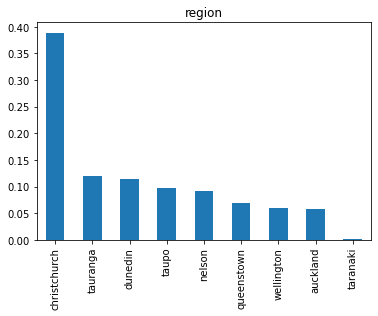

In [81]:
df3.region.value_counts(normalize=True).plot(kind = 'bar', title = "region")

# Christchurch is our biggest market share

<AxesSubplot:xlabel='region'>

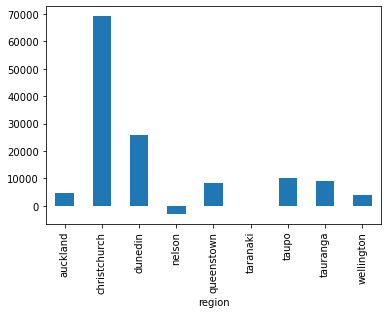

In [103]:
df3.groupby('region').profit_after_discount.sum().plot(kind='bar')

# Christchurch and Dunedine make up most profit

<AxesSubplot:xlabel='customer_type'>

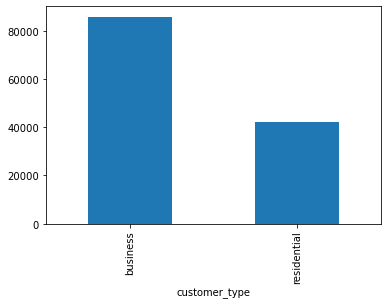

In [102]:
df3.groupby('customer_type').profit_after_discount.sum().plot(kind='bar')

# our business customers make ~2x than residential in term of profit after discount

<AxesSubplot:xlabel='product'>

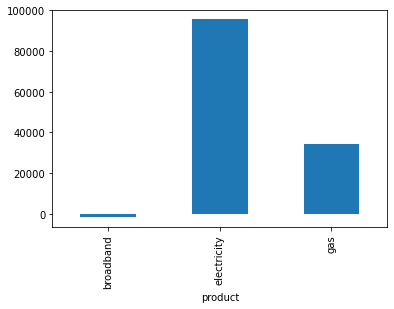

In [101]:
df3.groupby('product').profit_after_discount.sum().plot(kind='bar')

# we make most our money from electricity while we don't make money on broadband

<AxesSubplot:xlabel='discount_percent'>

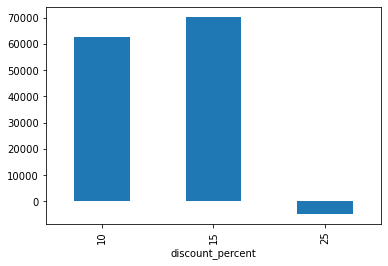

In [121]:
df3.groupby('discount_percent').profit_after_discount.sum().plot(kind='bar')

# we don't make money with 25% discount

<AxesSubplot:title={'center':'correspondence_method'}>

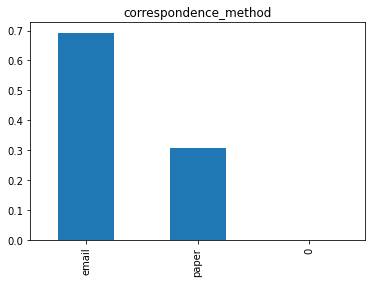

In [172]:

df3.correspondence_method.value_counts(normalize=True).plot(kind = 'bar', title = "correspondence_method")

# we still have 30% of our customer using paper correspondence method

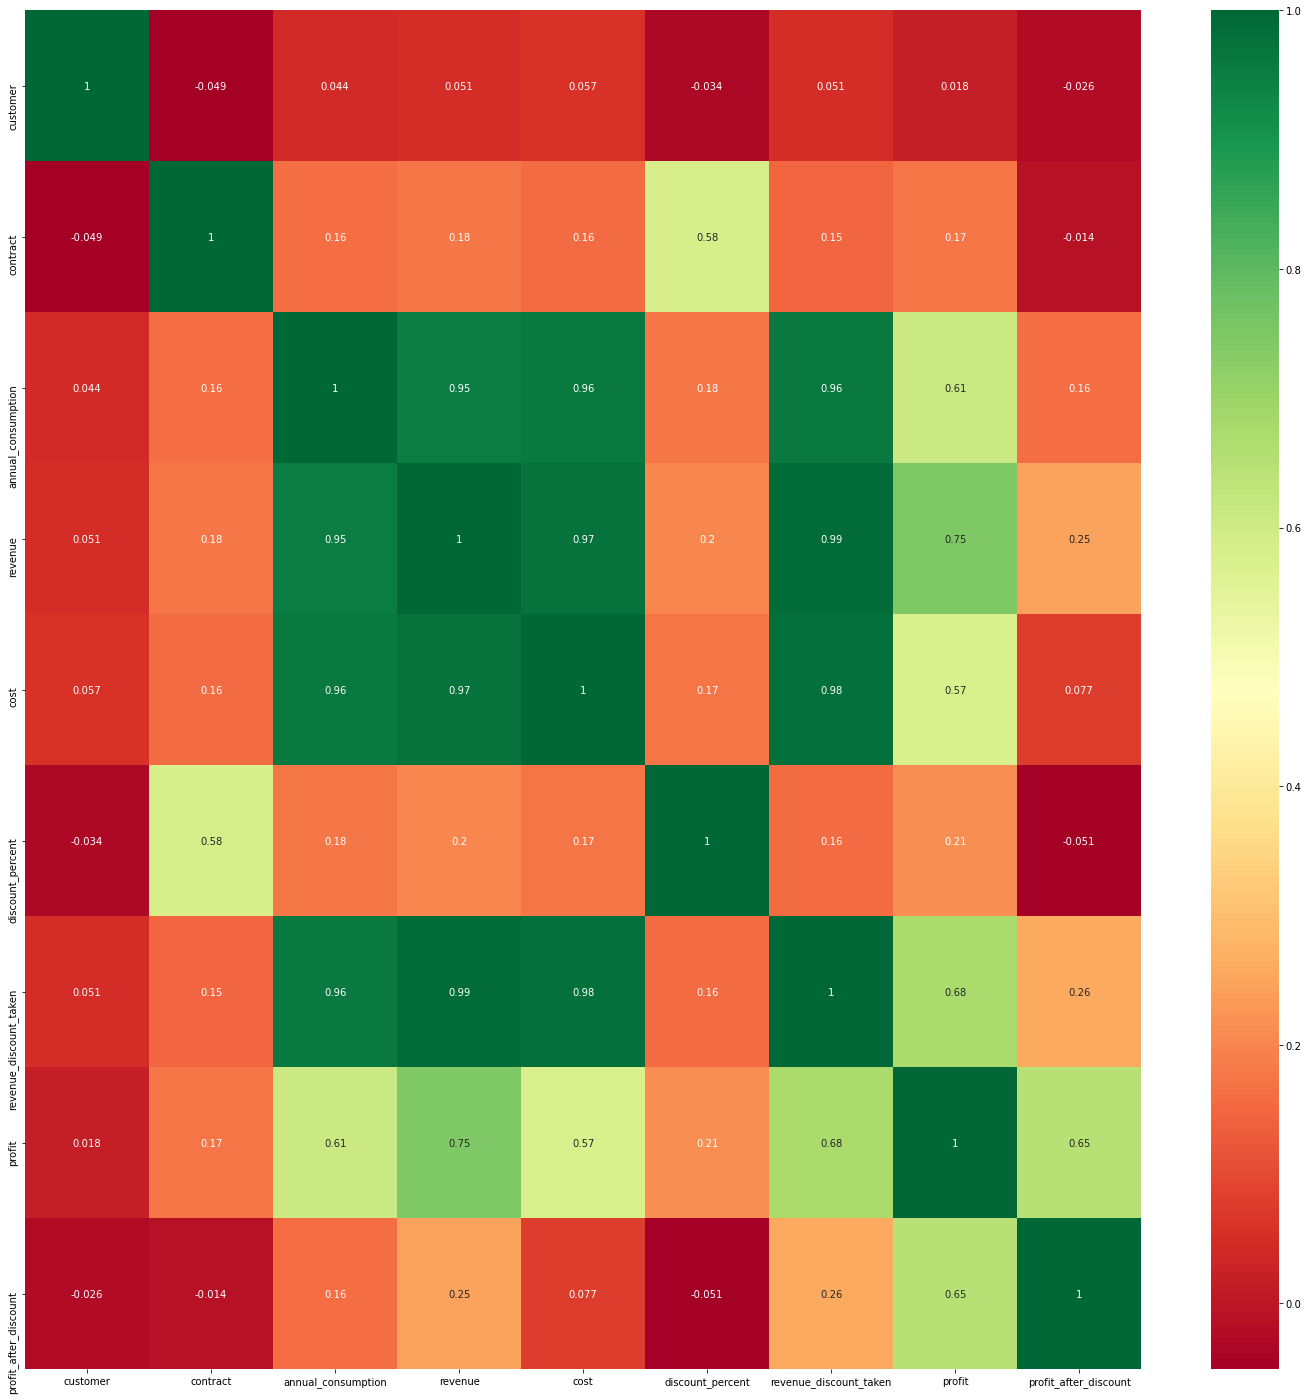

In [180]:
#get correlations of each features in dataset
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# no clear relationship between discount _percent vs profit after discount